# Creating FAO Agro Maps per crop

This notebook uses input data from <a href="http://www.fao.org/land-water/land/land-governance/land-resources-planning-toolbox/category/details/en/c/1026341/">FAO Agro Maps</a>. The scope is to extract all crops available at the desired resolution (admin level 2) merge with spatial admin layer and produce output that can later on be used in the downscaling process.

**Original code:** [Alexandros Korkovelos](https://github.com/akorkovelos) <br />
**Conceptualization & Methodological review :** [Alexandros Korkovelos](https://github.com/akorkovelos) <br />
**Updates, Modifications:** [Alexandros Korkovelos](https://github.com/akorkovelos)<br />
**Funding:** The World Bank (contract number: 7190531), [KTH](https://www.kth.se/en/itm/inst/energiteknik/forskning/desa/welcome-to-the-unit-of-energy-systems-analysis-kth-desa-1.197296)

In [1]:
# Import necessary modules and libraries

# Part 1
import pandas as pd
import os

# Part 2
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj
from shapely.geometry import Point, Polygon
%matplotlib inline

## Part 1. Creating csv files per crop

In [2]:
# Import data 

#path = r"N:\Agrodem\Downscaling\Input_Data\vectors\FAO_Agro_Map\moz"
path = r"C:\Oluchi\Benin\ben_FAO_DATA"
name_of_file = "ben_all_data.csv"

In [3]:
# Import csv as pandas dataframe
df = pd.read_csv(path + "\\" + name_of_file)
df = df.drop(["CONTINENT_CODE", "CONTINENT_NAME"], axis=1)

In [4]:
print ("The number of administrative areas (level 2) is {}, as shown below:".format(df.AREA_NAME.nunique()))
df.AREA_NAME.unique()

The number of administrative areas (level 2) is 73, as shown below:


array(['Banikoara', 'Gogounou', 'Kandi', 'Karimama', 'Malanville',
       'Segbana', 'Boukoumbe', 'Kerou', 'Cobli', 'Kouande', 'Materi',
       'Natingou', 'Pehonko', 'Tanguieta', 'Tchoukoutouna',
       'Abomey-Calavi', 'Allada', 'Kpomasse', 'Ouidah', 'So-Ava', 'Toffo',
       'Tori-Bossito', 'Ze', 'Bembereke', 'Kalale', 'Ndali', 'Nikki',
       'Parakou', 'Perere', 'Sinende', 'Bante', 'Dassa', 'Glazoue',
       'Ouesse', 'Savalou', 'Save', 'Aplahoue', 'Djakotome', 'Dogbo-Tota',
       'Klouekanme', 'Lalo', 'Toviklin', 'Copargo', 'Ouake', 'Cotonou',
       'Athieme', 'Bopa', 'Come', 'Grand-Popo', 'Houeyogbe', 'Adjarra',
       'Adjohoun', 'Aguegue', 'Akpro-Misserete', 'Avrankou', 'Bonou',
       'Dangbo', 'Porto Novo', 'Seme-Kpodji', 'Ikpinle (Adja-Oue',
       'Ifangni', 'Ketou', 'Pobe', 'Sakete', 'Abomey', 'Agbangnizoun',
       'Bohicon', 'Cove', 'Djidja', 'Ouinhi', 'Za Kpota', 'Zangnanado',
       'Zogbodome'], dtype=object)

<div class="alert alert-block alert-warning">
<b>Note_1:</b> According to the <a href="http://www.fao.org/land-water/land/land-governance/land-resources-planning-toolbox/category/details/en/c/1026341/">data source</a> the most recent year for which admin level 2 data for harvested area are availavle, is the year 2000. 
</div>

In [5]:
print ("The number of crops is {}, as shown below:".format(df.ITEM_NAME.nunique()))
df.ITEM_NAME.unique()

The number of crops is 27, as shown below:


array(['Potatoes', 'Sweet Potatoes', 'Cassava', 'Taro (Coco Yam)', 'Yams',
       'Sugar Cane', 'Broad Beans, Dry', 'Cow Peas, Dry', 'Bambara Beans',
       'Soybeans', 'Groundnuts in Shell', 'Rice, Paddy', 'Sesame Seed',
       'Seed Cotton', 'Tomatoes', 'Chillies&Peppers, Green',
       'Onions, Dry', 'Okra', 'Maize', 'Watermelons', 'Pineapples',
       'Pimento, Allspice', 'Millet', 'Tobacco Leaves', 'Sorghum',
       'Fonio', 'Pigeon Peas'], dtype=object)

<div class="alert alert-block alert-warning">
<b>Note_2:</b> According to the <a href="http://www.fao.org/land-water/land/land-governance/land-resources-planning-toolbox/category/details/en/c/1026341/">data source</a> the crops for which admin level 2 data for harvested area are availavle include Maize, Cassava, Dry Beans and Rice Paddy. Therefore we only focus on these crops.
</div>

### Extracting crop data per admin 2 to unique datarames

#### Maize

In [6]:
# Select crop and data as per availability
df_maize_2000_admin2 = df[(df['AEREA_HARVESTED'].notnull()) & 
                          (df['AEREA_HARVESTED'] > 0) &
                          (df['ITEM_NAME'] == "Maize") & 
                          (df['YEAR'] == "2000") &
                          (df['ADMIN_LEVEL'] == 2)]

# Calculate total harvested area
Maize_harv_area_ha_2000 = df_maize_2000_admin2["AEREA_HARVESTED"].sum()
print("\033[1m" + "Total harvested area for Maize under the selected parameters is:", Maize_harv_area_ha_2000, "ha")

# Other stats on the dataset
df_maize_2000_admin2.describe()

Total harvested area for Maize under the selected parameters is: 628930.0 ha


,ADMIN_LEVEL,ITEM_CODE,AEREA_HARVESTED,YIELD,PRODUCTION
count,73.0,73.0,73.000000,73.000000,73.000000
mean,2.0,56.0,8615.479452,1.127080,9913.424658
std,0.0,0.0,9461.808958,0.426544,12043.929366
min,2.0,56.0,3.000000,0.333000,1.000000
25%,2.0,56.0,2596.000000,0.861000,2912.000000
50%,2.0,56.0,6180.000000,1.027000,5983.000000
75%,2.0,56.0,11215.000000,1.301000,11360.000000
max,2.0,56.0,53090.000000,3.088000,69059.000000


In [7]:
# Estimate share of harvested area per admin_2 level (this will be used later for projection)
df_maize_2000_admin2["Admin_2_share"] = df_maize_2000_admin2["AEREA_HARVESTED"] / Maize_harv_area_ha_2000

C:\Users\oluchi\.conda\envs\agrodem_run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Projection to 2017-18 values based on [FAOSTAT](http://www.fao.org/faostat/en/#data/QC)

This code uses most updated vales for harvested area aggragated at national level, and distributes the values to admin 2 level sistricts based on shares estimated in previous steps. This method has of course caveats however, is the best available alternative in the absence of higher granularity data.

In [8]:
# This is the value retrieved from the source
Maize_harv_area_ha_2018 = 1157805

df_maize_2000_admin2["Area_Harv_2018"] = df_maize_2000_admin2["Admin_2_share"] * Maize_harv_area_ha_2018

C:\Users\oluchi\.conda\envs\agrodem_run\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
df_maize_2000_admin2

,COUNTRY_CODE,COUNTRY_NAME,AREA_CODE,AREA_NAME,ADMIN_LEVEL,ITEM_CODE,ITEM_NAME,YEAR,AEREA_HARVESTED,YIELD,PRODUCTION,Admin_2_share,Area_Harv_2018
231,BEN,Benin,BEN001001,Banikoara,2,56,Maize,2000,11964.0,1.10300,13197.0,0.019023,22024.675274
536,BEN,Benin,BEN001002,Gogounou,2,56,Maize,2000,6677.0,1.51000,10083.0,0.010616,12291.771715
837,BEN,Benin,BEN001003,Kandi,2,56,Maize,2000,19803.0,1.90300,37691.0,0.031487,36455.587132
1131,BEN,Benin,BEN001004,Karimama,2,56,Maize,2000,1250.0,0.90899,1136.0,0.001988,2301.140429
1433,BEN,Benin,BEN001005,Malanville,2,56,Maize,2000,4615.0,1.09200,5041.0,0.007338,8495.810464
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19894,BEN,Benin,BEN012005,Djidja,2,56,Maize,2000,8512.0,0.80000,6807.0,0.013534,15669.845865
20204,BEN,Benin,BEN012006,Ouinhi,2,56,Maize,2000,3429.0,0.77600,2662.0,0.005452,6312.488425
20509,BEN,Benin,BEN012007,Za Kpota,2,56,Maize,2000,7433.0,0.84399,6277.0,0.011818,13683.501447
20828,BEN,Benin,BEN012008,Zangnanado,2,56,Maize,2000,2596.0,0.76999,1999.0,0.004128,4779.008443


#### Cassava

In [10]:
df_cassava_2000_admin2 = df[(df['AEREA_HARVESTED'].notnull()) & 
                          (df['AEREA_HARVESTED'] > 0) &
                          (df['ITEM_NAME'] == "Cassava") & 
                          (df['YEAR'] == "2000")&
                          (df['ADMIN_LEVEL'] == 2)]

# Calculate total harvested area
Cassava_harv_area_ha_2000 = df_cassava_2000_admin2["AEREA_HARVESTED"].sum()
print("\033[1m" + "Total harvested area for Cassava under the selected parameters is:", Cassava_harv_area_ha_2000, "ha")

# Other stats on the dataset
df_cassava_2000_admin2.describe()

Total harvested area for Cassava under the selected parameters is: 202788.0 ha


,ADMIN_LEVEL,ITEM_CODE,AEREA_HARVESTED,YIELD,PRODUCTION
count,72.0,72.0,72.000000,72.000000,72.000000
mean,2.0,125.0,2816.500000,10.185986,29923.680556
std,0.0,0.0,4011.352296,4.859656,45134.090286
min,2.0,125.0,2.000000,3.990000,10.000000
25%,2.0,125.0,511.000000,6.964500,3550.250000
50%,2.0,125.0,1388.500000,8.924500,14792.000000
75%,2.0,125.0,3052.250000,12.717000,33040.000000
max,2.0,125.0,23556.000000,27.763000,248876.000000


In [11]:
# Estimate share of harvested area per admin_2 level (this will be used later for projection)
df_cassava_2000_admin2["Admin_2_share"] = df_cassava_2000_admin2["AEREA_HARVESTED"] / Cassava_harv_area_ha_2000

C:\Users\oluchi\.conda\envs\agrodem_run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Projection to 2017-18 values based on [FAOSTAT](http://www.fao.org/faostat/en/#data/QC)

This code uses most updated vales for harvested area aggragated at national level, and distributes the values to admin 2 level sistricts based on shares estimated in previous steps. This method has of course caveats however, is the best available alternative in the absence of higher granularity data.

In [12]:
# This is the value retrieved from the source
Cassava_harv_area_ha_2018 = 280810

df_cassava_2000_admin2["Area_Harv_2018"] = df_cassava_2000_admin2["Admin_2_share"] * Cassava_harv_area_ha_2018

C:\Users\oluchi\.conda\envs\agrodem_run\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
df_cassava_2000_admin2

,COUNTRY_CODE,COUNTRY_NAME,AREA_CODE,AREA_NAME,ADMIN_LEVEL,ITEM_CODE,ITEM_NAME,YEAR,AEREA_HARVESTED,YIELD,PRODUCTION,Admin_2_share,Area_Harv_2018
30,BEN,Benin,BEN001001,Banikoara,2,125,Cassava,2000,453.0,5.000,2265.0,0.002234,627.290224
340,BEN,Benin,BEN001002,Gogounou,2,125,Cassava,2000,130.0,6.723,874.0,0.000641,180.017062
645,BEN,Benin,BEN001003,Kandi,2,125,Cassava,2000,654.0,4.650,3041.0,0.003225,905.624297
940,BEN,Benin,BEN001004,Karimama,2,125,Cassava,2000,120.0,6.467,776.0,0.000592,166.169596
1237,BEN,Benin,BEN001005,Malanville,2,125,Cassava,2000,113.0,6.080,687.0,0.000557,156.476369
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19684,BEN,Benin,BEN012005,Djidja,2,125,Cassava,2000,2455.0,9.512,23351.0,0.012106,3399.552981
19998,BEN,Benin,BEN012006,Ouinhi,2,125,Cassava,2000,3395.0,5.770,19588.0,0.016742,4701.214815
20306,BEN,Benin,BEN012007,Za Kpota,2,125,Cassava,2000,1295.0,6.111,7914.0,0.006386,1793.246888
20617,BEN,Benin,BEN012008,Zangnanado,2,125,Cassava,2000,1942.0,5.908,11474.0,0.009577,2689.177959


#### Yam

In [14]:
df_yams_2000_admin2 = df[(df['AEREA_HARVESTED'].notnull()) & 
                          (df['AEREA_HARVESTED'] > 0) &
                          (df['ITEM_NAME'] == "Yams") & 
                          (df['YEAR'] == "2000")&
                          (df['ADMIN_LEVEL'] == 2)]

# Calculate total harvested area
yams_harv_area_ha_2000 = df_yams_2000_admin2["AEREA_HARVESTED"].sum()
print("\033[1m" + "Total harvested area for Yams under the selected parameters is:", yams_harv_area_ha_2000, "ha")

# Other stats on the dataset
df_yams_2000_admin2.describe()

Total harvested area for Yams under the selected parameters is: 134666.0 ha


,ADMIN_LEVEL,ITEM_CODE,AEREA_HARVESTED,YIELD,PRODUCTION
count,45.0,45.0,45.000000,45.000000,45.000000
mean,2.0,137.0,2992.577778,10.521733,32281.355556
std,0.0,0.0,3000.094260,3.870496,35162.967418
min,2.0,137.0,1.000000,0.850000,7.000000
25%,2.0,137.0,115.000000,7.700000,750.000000
50%,2.0,137.0,1844.000000,10.462000,24462.000000
75%,2.0,137.0,4942.000000,13.500000,48960.000000
max,2.0,137.0,11232.000000,17.600000,134784.000000


In [15]:
# Estimate share of harvested area per admin_2 level (this will be used later for projection)
df_yams_2000_admin2["Admin_2_share"] = df_yams_2000_admin2["AEREA_HARVESTED"] / yams_harv_area_ha_2000

C:\Users\oluchi\.conda\envs\agrodem_run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Projection to 2017-18 values based on [FAOSTAT](http://www.fao.org/faostat/en/#data/QC)

This code uses most updated vales for harvested area aggragated at national level, and distributes the values to admin 2 level sistricts based on shares estimated in previous steps. This method has of course caveats however, is the best available alternative in the absence of higher granularity data.

In [16]:
# This is the value retrieved from the source
yams_harv_area_ha_2018 = 216592

df_yams_2000_admin2["Area_Harv_2018"] = df_yams_2000_admin2["Admin_2_share"] * yams_harv_area_ha_2018

C:\Users\oluchi\.conda\envs\agrodem_run\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
df_yams_2000_admin2

,COUNTRY_CODE,COUNTRY_NAME,AREA_CODE,AREA_NAME,ADMIN_LEVEL,ITEM_CODE,ITEM_NAME,YEAR,AEREA_HARVESTED,YIELD,PRODUCTION,Admin_2_share,Area_Harv_2018
55,BEN,Benin,BEN001001,Banikoara,2,137,Yams,2000,3230.0,8.000,25840.0,0.023985,5195.017005
365,BEN,Benin,BEN001002,Gogounou,2,137,Yams,2000,2466.0,10.000,24660.0,0.018312,3966.226605
670,BEN,Benin,BEN001003,Kandi,2,137,Yams,2000,1083.0,4.500,4874.0,0.008042,1741.858643
1883,BEN,Benin,BEN002001,Boukoumbe,2,137,Yams,2000,945.0,9.301,8789.0,0.007017,1519.904356
2177,BEN,Benin,BEN002002,Kerou,2,137,Yams,2000,5424.0,10.900,59122.0,0.040277,8723.768494
2465,BEN,Benin,BEN002003,Cobli,2,137,Yams,2000,1759.0,11.800,20756.0,0.013062,2829.112976
2756,BEN,Benin,BEN002004,Kouande,2,137,Yams,2000,4690.0,13.100,61439.0,0.034827,7543.229026
3042,BEN,Benin,BEN002005,Materi,2,137,Yams,2000,1807.0,7.700,13914.0,0.013418,2906.314467
3336,BEN,Benin,BEN002006,Natingou,2,137,Yams,2000,4000.0,11.300,45200.0,0.029703,6433.457591
3624,BEN,Benin,BEN002007,Pehonko,2,137,Yams,2000,2920.0,14.677,42856.0,0.021683,4696.424042


#### Cotton

For Benin, most recent data available for cotton seed from FAO source is the year 1999. Therfore, we import new data as the previous csv file is for the year 2000.

In [18]:
# Import data 

#path = r"N:\Agrodem\Downscaling\Input_Data\vectors\FAO_Agro_Map\moz"
path = r"C:\Oluchi\Benin\ben_FAO_DATA"
name_of_file = "ben_cotton_1999.csv"

In [21]:
# Import csv as pandas dataframe
df_cotton= pd.read_csv(path + "\\" + name_of_file)
df_cotton= df_cotton.drop(["CONTINENT_CODE", "CONTINENT_NAME"], axis=1)
df_cotton.head()

,COUNTRY_CODE,COUNTRY_NAME,AREA_CODE,AREA_NAME,ADMIN_LEVEL,ITEM_CODE,ITEM_NAME,YEAR,AEREA_HARVESTED
0,BEN,Benin,BEN012001,Abomey,2,328,Seed Cotton,1999,959.0
1,BEN,Benin,BEN012002,Agbangnizoun,2,328,Seed Cotton,1999,805.0
2,BEN,Benin,BEN006001,Aplahoue,2,328,Seed Cotton,1999,13336.0
3,BEN,Benin,BEN009001,Athieme,2,328,Seed Cotton,1999,75.0
4,BEN,Benin,BEN001001,Banikoara,2,328,Seed Cotton,1999,27336.0


In [33]:
# Calculate total harvested area
Cotton_harv_area_ha_1999 = df_cotton["AEREA_HARVESTED"].sum()
print("\033[1m" + "Total harvested area for Cotton under the selected parameters is:", Cotton_harv_area_ha_1999, "ha")

# Other stats on the dataset
df_cotton.describe()

Total harvested area for Cotton under the selected parameters is: 380347.0 ha


,ADMIN_LEVEL,ITEM_CODE,YEAR,AEREA_HARVESTED
count,50.0,50.0,50.0,50.000000
mean,2.0,328.0,1999.0,7606.940000
std,0.0,0.0,0.0,7369.295047
min,2.0,328.0,1999.0,75.000000
25%,2.0,328.0,1999.0,1287.750000
50%,2.0,328.0,1999.0,5543.000000
75%,2.0,328.0,1999.0,11812.500000
max,2.0,328.0,1999.0,28804.000000


In [34]:
# Estimate share of harvested area per admin_2 level (this will be used later for projection)
df_cotton["Admin_2_share"] = df_cotton["AEREA_HARVESTED"] / Cotton_harv_area_ha_1999

#### Projection to 2018 values based on [FAOSTAT](http://www.fao.org/faostat/en/#data/QC)

This code uses most updated vales for harvested area aggragated at national level, and distributes the values to admin 2 level sistricts based on shares estimated in previous steps. This method has of course caveats however, is the best available alternative in the absence of higher granularity data.

In [35]:
# This is the value retrieved from the source
Cotton_harv_area_ha_2018 = 3000000

df_cotton["Area_Harv_2018"] = df_cotton["Admin_2_share"] * Cotton_harv_area_ha_2018

In [36]:
df_cotton

,COUNTRY_CODE,COUNTRY_NAME,AREA_CODE,AREA_NAME,ADMIN_LEVEL,ITEM_CODE,ITEM_NAME,YEAR,AEREA_HARVESTED,Admin_2_share,Area_Harv_2018
0,BEN,Benin,BEN012001,Abomey,2,328,Seed Cotton,1999,959.0,0.002521,7564.145373
1,BEN,Benin,BEN012002,Agbangnizoun,2,328,Seed Cotton,1999,805.0,0.002116,6349.465094
2,BEN,Benin,BEN006001,Aplahoue,2,328,Seed Cotton,1999,13336.0,0.035063,105188.157130
3,BEN,Benin,BEN009001,Athieme,2,328,Seed Cotton,1999,75.0,0.000197,591.565071
4,BEN,Benin,BEN001001,Banikoara,2,328,Seed Cotton,1999,27336.0,0.071871,215613.637021
5,BEN,Benin,BEN005001,Bante,2,328,Seed Cotton,1999,11102.0,0.029189,87567.405553
6,BEN,Benin,BEN004001,Bembereke,2,328,Seed Cotton,1999,16394.0,0.043103,129308.236952
7,BEN,Benin,BEN012003,Bohicon,2,328,Seed Cotton,1999,857.0,0.002253,6759.616876
8,BEN,Benin,BEN009002,Bopa,2,328,Seed Cotton,1999,246.0,0.000647,1940.333432
9,BEN,Benin,BEN002001,Boukoumbe,2,328,Seed Cotton,1999,328.0,0.000862,2587.111243


### Exporting crop dataframes into separate csv

This part exports the csv files for the crops identified. These csv files can be used in a GIS environment (e.g. Qgis) and be merged with the admin 2 layer. In case you want to proceed and perform this here using geopandas, please proceed to the following steps.

In [223]:
## Define output path
#path = r"\\ug.kth.se\dfs\home\a\l\alekor\appdata\xp.V2\Desktop\Testing code"
#
#df_maize_2000_admin2.to_csv(os.path.join(path,"{c}.csv".format(c="Moz_Maize_2000_admin2")))
#df_cassava_2000_admin2.to_csv(os.path.join(path,"{c}.csv".format(c="Moz_Cassava_2000_admin2")))
#df_dryBeans_2000_admin2.to_csv(os.path.join(path,"{c}.csv".format(c="Moz_DryBeans_2000_admin2")))
#df_rice_2000_admin2.to_csv(os.path.join(path,"{c}.csv".format(c="Moz_RicePaddy_2000_admin2")))

## Part 2. Performing spatial join (merge) using geopandas

### Import admin 2 layer

In this case this is a shapefile, but other formats can be accepted here.

In [37]:
#path_shp = r"N:\Agrodem\Downscaling\Input_Data\vectors\FAO_Agro_Map\moz"
path = r"C:\Oluchi\Benin\ben_FAO_DATA"
name_shp = "ben_2.shp"
admin_2_gdf = gpd.read_file(path + "\\" + name_shp)

In [38]:
admin_2_gdf.columns

Index(['parent', 'adm0_name', 'code', 'name', 'level', 'geometry'], dtype='object')

### Renaming dfs

First, we need to rename the admin_2 column name in the previous dataframes in order to match with the "merging" column in the imported shapefile.

In [39]:
df_maize_2000_admin2.rename(columns={"AREA_NAME":"name"}, inplace=True)
df_cassava_2000_admin2.rename(columns={"AREA_NAME":"name"}, inplace=True)
df_yams_2000_admin2.rename(columns={"AREA_NAME":"name"}, inplace=True)
df_cotton.rename(columns={"AREA_NAME":"name"}, inplace=True)

C:\Users\oluchi\.conda\envs\agrodem_run\lib\site-packages\pandas\core\frame.py:4130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Creating unique gdfs per crop

In [40]:
admin_2_maize_gdf = admin_2_gdf.merge(df_maize_2000_admin2, on="name")
admin_2_cassava_gdf = admin_2_gdf.merge(df_cassava_2000_admin2, on="name")
admin_2_yams_gdf = admin_2_gdf.merge(df_yams_2000_admin2, on="name")
admin_2_cotton_gdf = admin_2_gdf.merge(df_cotton, on="name")

### Cross-checking estimated

Calculating total area per district and cross-checking that projected harvested ara (as per method above) does not surpasses physical limits. Areas in ha.

#### Maize

harv_area_2018_ha

In [41]:
admin_2_maize_gdf["tot_dist_area_ha"] = admin_2_maize_gdf['geometry'].to_crs({'init': 'epsg:32631'})\
                .map(lambda p: p.area / 10**4)
admin_2_maize_gdf["Test"] = admin_2_maize_gdf["tot_dist_area_ha"] > admin_2_maize_gdf["Area_Harv_2018"]
admin_2_maize_gdf["Test"].unique

C:\Users\oluchi\.conda\envs\agrodem_run\lib\site-packages\pyproj\crs\crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<bound method Series.unique of 0      True
1      True
2      True
3      True
4      True
      ...  
68     True
69     True
70     True
71     True
72    False
Name: Test, Length: 73, dtype: bool>

In [42]:
# Adding new column for the share of harvested area over the total area per district
admin_2_maize_gdf["harv_share_of_tot"] = admin_2_maize_gdf["Area_Harv_2018"] / admin_2_maize_gdf["tot_dist_area_ha"]

#### Cassava

In [43]:
admin_2_cassava_gdf["tot_dist_area_ha"] = admin_2_cassava_gdf['geometry'].to_crs({'init': 'epsg:32631'})\
                .map(lambda p: p.area / 10**4)
admin_2_cassava_gdf["Test"] = admin_2_cassava_gdf["tot_dist_area_ha"] > admin_2_cassava_gdf["Area_Harv_2018"]
admin_2_cassava_gdf["Test"].unique

C:\Users\oluchi\.conda\envs\agrodem_run\lib\site-packages\pyproj\crs\crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<bound method Series.unique of 0     True
1     True
2     True
3     True
4     True
      ... 
67    True
68    True
69    True
70    True
71    True
Name: Test, Length: 72, dtype: bool>

In [44]:
# Adding new column for the share of harvested area over the total area per district
admin_2_cassava_gdf["harv_share_of_tot"] = admin_2_cassava_gdf["Area_Harv_2018"] / admin_2_cassava_gdf["tot_dist_area_ha"]

#### Yams

In [45]:
admin_2_yams_gdf["tot_dist_area_ha"] = admin_2_yams_gdf['geometry'].to_crs({'init': 'epsg:32631'})\
                .map(lambda p: p.area / 10**4)
admin_2_yams_gdf["Test"] = admin_2_yams_gdf["tot_dist_area_ha"] > admin_2_yams_gdf["Area_Harv_2018"]
admin_2_yams_gdf["Test"].unique

C:\Users\oluchi\.conda\envs\agrodem_run\lib\site-packages\pyproj\crs\crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<bound method Series.unique of 0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
40    True
41    True
42    True
43    True
44    True
Name: Test, dtype: bool>

In [46]:
# Adding new column for the share of harvested area over the total area per district
admin_2_yams_gdf["harv_share_of_tot"] = admin_2_yams_gdf["Area_Harv_2018"] / admin_2_yams_gdf["tot_dist_area_ha"]

#### Cotton

In [47]:
admin_2_cotton_gdf["tot_dist_area_ha"] = admin_2_cotton_gdf['geometry'].to_crs({'init': 'epsg:32631'})\
                .map(lambda p: p.area / 10**4)
admin_2_cotton_gdf["Test"] = admin_2_cotton_gdf["tot_dist_area_ha"] > admin_2_cotton_gdf["Area_Harv_2018"]
admin_2_cotton_gdf["Test"].unique

C:\Users\oluchi\.conda\envs\agrodem_run\lib\site-packages\pyproj\crs\crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<bound method Series.unique of 0      True
1     False
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18    False
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31    False
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46    False
47     True
48     True
49     True
Name: Test, dtype: bool>

In [48]:
# Adding new column for the share of harvested area over the total area per district
admin_2_cotton_gdf["harv_share_of_tot"] = admin_2_cotton_gdf["Area_Harv_2018"] / admin_2_cotton_gdf["tot_dist_area_ha"]

### Cleaning the gdfs

In [49]:
admin_2_maize_gdf.columns

Index(['parent', 'adm0_name', 'code', 'name', 'level', 'geometry',
       'COUNTRY_CODE', 'COUNTRY_NAME', 'AREA_CODE', 'ADMIN_LEVEL', 'ITEM_CODE',
       'ITEM_NAME', 'YEAR', 'AEREA_HARVESTED', 'YIELD', 'PRODUCTION',
       'Admin_2_share', 'Area_Harv_2018', 'tot_dist_area_ha', 'Test',
       'harv_share_of_tot'],
      dtype='object')

In [50]:
# Maize
admin_2_maize_gdf.rename(columns={"COUNTRY_NAME":"country",
                                  "COUNTRY_CODE":"country_code",
                                  "name":"admin2",
                                  "ITEM_NAME":"crop",
                                  "AEREA_HARVESTED":"harea_2000_ha",
                                  "YIELD":"yield",
                                  "YEAR":"year",
                                  "PRODUCTION":"product_ha",
                                  "Admin_2_share": "shareofsum",
                                  "Area_Harv_2018":"harv_area_ha",
                                  "tot_dist_area_ha":"district_area_ha",
                                  "harv_share_of_tot":"shareofdistrict"}, inplace=True)

admin_2_maize_gdf = admin_2_maize_gdf.drop(["parent","adm0_name","code","level","ADMIN_LEVEL","ITEM_CODE","AREA_CODE", "Test"], axis=1)

# Cassava
admin_2_cassava_gdf.rename(columns={"COUNTRY_NAME":"country",
                                  "COUNTRY_CODE":"country_code",
                                  "name":"admin2",
                                  "ITEM_NAME":"crop",
                                  "AEREA_HARVESTED":"harea_2000_ha",
                                  "YIELD":"yield",
                                  "YEAR":"year",
                                  "PRODUCTION":"product_ha",
                                  "Admin_2_share": "shareofsum",
                                  "Area_Harv_2018":"harv_area_ha",
                                  "tot_dist_area_ha":"district_area_ha",
                                  "harv_share_of_tot":"shareofdistrict"}, inplace=True)

admin_2_cassava_gdf = admin_2_cassava_gdf.drop(["parent","adm0_name","code","level","ADMIN_LEVEL","ITEM_CODE","AREA_CODE","Test"], axis=1)

# Yams
admin_2_yams_gdf.rename(columns={"COUNTRY_NAME":"country",
                                  "COUNTRY_CODE":"country_code",
                                  "name":"admin2",
                                  "ITEM_NAME":"crop",
                                  "AEREA_HARVESTED":"harea_2000_ha",
                                  "YIELD":"yield",
                                  "YEAR":"year",
                                  "PRODUCTION":"product_ha", 
                                  "Admin_2_share": "shareofsum",
                                  "Area_Harv_2018":"harv_area_ha",
                                  "tot_dist_area_ha":"district_area_ha",
                                  "harv_share_of_tot":"shareofdistrict"}, inplace=True)

admin_2_yams_gdf = admin_2_yams_gdf.drop(["parent","adm0_name","code","level","ADMIN_LEVEL","ITEM_CODE","AREA_CODE","Test"], axis=1)

# Cotton
admin_2_cotton_gdf.rename(columns={"COUNTRY_NAME":"country",
                                  "COUNTRY_CODE":"country_code",
                                  "name":"admin2",
                                  "ITEM_NAME":"crop",
                                  "AEREA_HARVESTED":"harea_1999_ha",
                                  "YIELD":"yield",
                                  "YEAR":"year",
                                  "PRODUCTION":"product_ha",
                                  "Admin_2_share": "shareofsum",
                                  "Area_Harv_2018":"harv_area_ha",
                                  "tot_dist_area_ha":"district_area_ha",
                                  "harv_share_of_tot":"shareofdistrict"}, inplace=True)

admin_2_cotton_gdf = admin_2_cotton_gdf.drop(["parent","adm0_name","code","level","ADMIN_LEVEL","ITEM_CODE","AREA_CODE","Test"], axis=1)



### Quick visualization of results

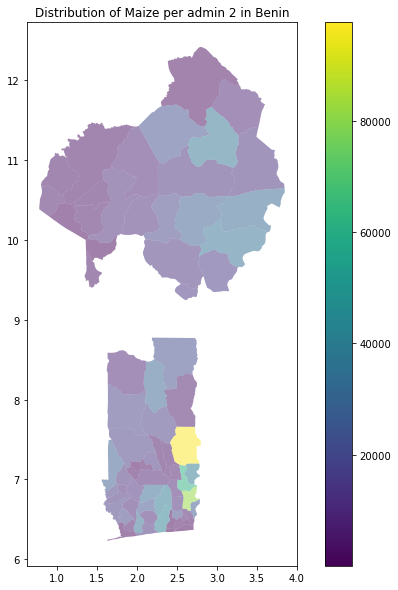

In [52]:
#Maize

# Create the axis first
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all crops
admin_2_maize_gdf.sort_values('harv_area_ha', ascending=True).plot(
    ax=ax, column='harv_area_ha', legend=True, alpha=0.5)

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Distribution of {} per admin 2 in Benin'.format("Maize"))

# Save plot as figure 
plt.savefig('Maize_Harv_Area_2018.png', bbox_inches='tight')

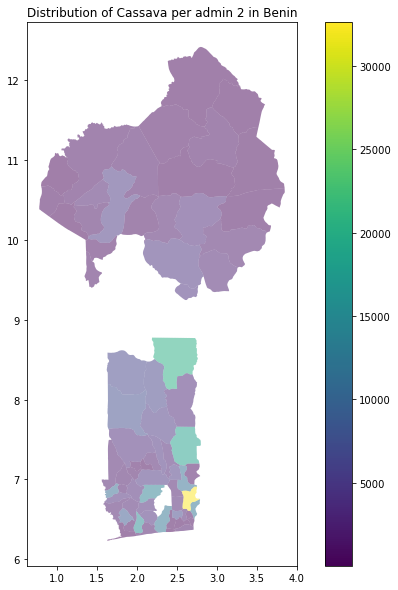

In [53]:
# Cassava

# Create the axis first
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all crops
admin_2_cassava_gdf.sort_values('harv_area_ha', ascending=True).plot(
    ax=ax, column='harv_area_ha', legend=True, alpha=0.5)

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Distribution of {} per admin 2 in Benin'.format("Cassava"))

# Save plot as figure 
plt.savefig('Cassava_Harv_Area_2018.png', bbox_inches='tight')

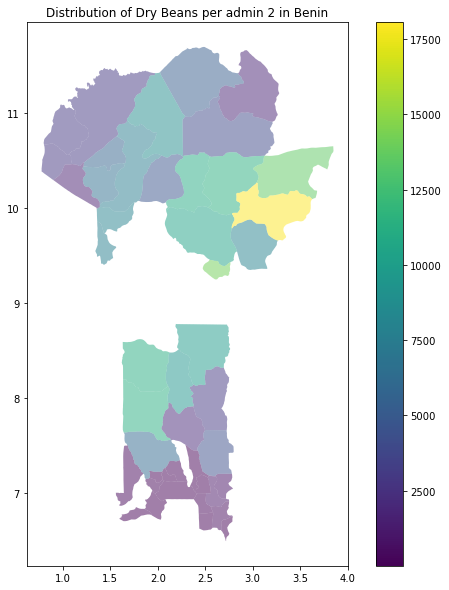

In [54]:
# Yams

# Create the axis first
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all crops
admin_2_yams_gdf.sort_values('harv_area_ha', ascending=True).plot(
    ax=ax, column='harv_area_ha', legend=True, alpha=0.5)

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Distribution of {} per admin 2 in Benin'.format("Dry Beans"))

# Save plot as figure 
plt.savefig('Yams_Harv_Area_2018.png', bbox_inches='tight')

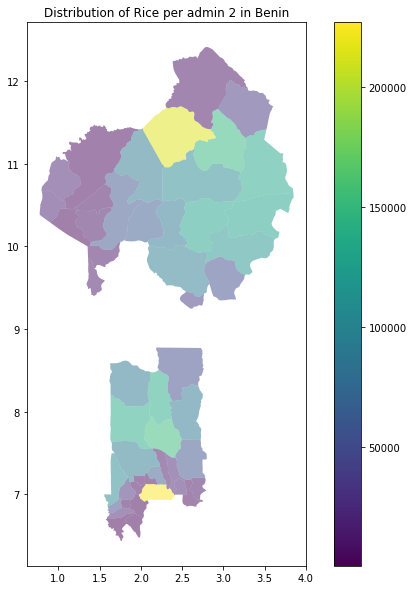

In [55]:
# Cotton

# Create the axis first
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all crops
admin_2_cotton_gdf.sort_values('harv_area_ha', ascending=True).plot(
    ax=ax, column='harv_area_ha', legend=True, alpha=0.5)

# Make figure aspect ratio ensure that 10x10 km square appears square
ax.set_aspect('equal', 'box')
txt = ax.set_title('Distribution of {} per admin 2 in Benin'.format("Rice"))

# Save plot as figure 
plt.savefig('Cotton_Harv_Area_2018.png', bbox_inches='tight')

### Exporting gdfs to shapefiles (shp)

In [56]:
# Define output path
#path = r"N:\Agrodem\Downscaling\Output_Data\Crop_Maps"
path = r"C:\Benin\agrodem_preprocessing\Downscaling\Output_Data\Crop_Maps"

#Maize
admin_2_maize_gdf.to_file(os.path.join(path,"{c}.shp".format(c="Ben_Maize_2018_admin2")))

#Cassava
admin_2_cassava_gdf.to_file(os.path.join(path,"{c}.shp".format(c="Ben_Cassava_2018_admin2")))

#Dry beans
admin_2_yams_gdf.to_file(os.path.join(path,"{c}.shp".format(c="Ben_yams_2018_admin2")))

#Rice paddy
admin_2_cotton_gdf.to_file(os.path.join(path,"{c}.shp".format(c="Ben_cotton_2018_admin2")))